# **Data Wrangling Project 2024**
---

In fulfillment of the course *Data Wrangling XB_0014* at the *Vrije Universiteit Amsterdam*.<br>
This project was conducted by **Alvaro Pratama Maharto, Michael Evan Sutanto, Mahmoud Ashtar, and Miguel Sadorra.**


## **TOPIC**: Marketing Strategy Effectivity
This research will be taking a look at the effects of different types of marketing campaigns and their effectivity in terms of clickthrough rate, customer engagement, and customer acquisition.
We will be having a look at the dataset with the following question in mind:
### RESEARCH QUESTION
*How do different marketing strategies, particularly those used in bulk campaigns, impact the overall effectiveness of marketing initiatives, considering metrics such as clickthrough rates, customer engagement, and customer acquisition?*

## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

In [ ]:
campaigns_df = pd.read_csv("campaigns.csv")
messages_df = pd.read_csv("messages-demo.csv")

messages_df.head()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_7180\1183315834.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv("messages-demo.csv")


,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [ ]:
print(len(messages_df))
print(len(campaigns_df))

10000000
1907


## Data Cleaning


### Sampling
Since the data is about 10 million rows big, the group decided to use only a sample of 40% of the data to cut down on computing time.

In [ ]:
messages_df = messages_df[messages_df["message_type"] == "bulk"]
campaigns_df = campaigns_df[campaigns_df["campaign_type"] == "bulk"]

messages_sample = messages_df.sample(frac= 0.40, random_state= 42, replace= False)

In [ ]:
messages_sample.head()
print(len(messages_sample))

2824958


### Data Dropping
We will eliminate all of the unneccessary columns from the dataframes we created above and consolidate them into one `merged_df`

In [ ]:
print("Messages Database:\n",list(messages_df.columns),"\n")
print("Campaigns Database:\n",list(campaigns_df.columns))

Messages Database:
 ['id', 'message_id', 'campaign_id', 'message_type', 'client_id', 'channel', 'category', 'platform', 'email_provider', 'stream', 'date', 'sent_at', 'is_opened', 'opened_first_time_at', 'opened_last_time_at', 'is_clicked', 'clicked_first_time_at', 'clicked_last_time_at', 'is_unsubscribed', 'unsubscribed_at', 'is_hard_bounced', 'hard_bounced_at', 'is_soft_bounced', 'soft_bounced_at', 'is_complained', 'complained_at', 'is_blocked', 'blocked_at', 'is_purchased', 'purchased_at', 'created_at', 'updated_at'] 

Campaigns Database:
 ['id', 'campaign_type', 'channel', 'topic', 'started_at', 'finished_at', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_test', 'position']


In [ ]:
messages_sample = messages_sample.drop(["id", "stream", "hard_bounced_at", "soft_bounced_at","is_soft_bounced", "is_hard_bounced",
                                        "message_type", "message_id", "created_at", "updated_at", "is_complained", "complained_at"],
                                           axis= 1)

campaigns_df = campaigns_df.drop(["warmup_mode", "started_at", "finished_at", "total_count", "channel"], axis=1)

In [ ]:
display(messages_sample[:10])

,campaign_id,client_id,channel,category,platform,email_provider,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_blocked,blocked_at,is_purchased,purchased_at
7286261,230,1515915625488886720,email,NaN,NaN,gmail.com,2021-05-27,2021-05-27 08:12:44,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
848463,64,1515915625608891382,mobile_push,NaN,NaN,NaN,2021-04-30,2021-04-30 08:32:01,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
5778692,150,1515915625486927106,email,NaN,NaN,yandex.ru,2021-05-21,2021-05-21 08:58:57,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
7539782,230,1515915625488084724,email,NaN,desktop,mail.ru,2021-05-27,2021-05-27 10:32:50,t,2021-05-28 01:31:08,2021-05-28 01:31:08,f,NaN,NaN,f,NaN,f,NaN,f,NaN
6710082,152,1515915625490799486,email,NaN,NaN,mail.ru,2021-05-24,2021-05-24 08:41:10,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
827892,64,1515915625571018047,mobile_push,NaN,NaN,NaN,2021-04-30,2021-04-30 07:58:37,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
7945106,257,1515915625490421081,mobile_push,NaN,NaN,NaN,2021-05-28,2021-05-28 13:00:24,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
7965469,257,1515915625501578324,mobile_push,NaN,NaN,NaN,2021-05-28,2021-05-28 13:00:33,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
6111520,150,1515915625500830959,email,NaN,desktop,mail.ru,2021-05-21,2021-05-21 07:17:51,t,2021-05-21 09:17:47,2021-05-21 09:17:47,f,NaN,NaN,f,NaN,f,NaN,f,NaN
9701465,366,1515915625500834555,email,NaN,NaN,yandex.ru,2021-06-10,2021-06-10 08:30:54,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN


In [ ]:
display(campaigns_df[:10])

,id,campaign_type,topic,ab_test,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
1,64,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
2,78,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
3,79,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
4,89,bulk,NaN,NaN,NaN,109.0,False,True,True,False,False,False,NaN,NaN
5,110,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
6,111,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
7,129,bulk,sale out,NaN,NaN,133.0,False,False,True,False,False,False,NaN,NaN
8,136,bulk,sale out,NaN,NaN,133.0,False,False,True,False,False,False,NaN,NaN
9,138,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN


### Handling Missing Value

In [ ]:
messages_sample.isna().sum()

campaign_id                    0
client_id                      0
channel                        0
category                 2824958
platform                 2657031
email_provider           1690477
date                           0
sent_at                        0
is_opened                      0
opened_first_time_at     2429395
opened_last_time_at      2429395
is_clicked                     0
clicked_first_time_at    2790453
clicked_last_time_at     2790453
is_unsubscribed                0
unsubscribed_at          2708003
is_blocked                     0
blocked_at               2824937
is_purchased                   0
purchased_at             2823930
dtype: int64

In [ ]:
messages_sample = messages_sample.drop(["category", "platform", "email_provider", "opened_first_time_at", "opened_last_time_at", "clicked_first_time_at",
                                        "clicked_last_time_at", "blocked_at", "unsubscribed_at", "purchased_at"], axis=1)
messages_sample.isna().sum()

campaign_id        0
client_id          0
channel            0
date               0
sent_at            0
is_opened          0
is_clicked         0
is_unsubscribed    0
is_blocked         0
is_purchased       0
dtype: int64

In [ ]:
campaigns_df.isna().sum()

id                                 0
campaign_type                      0
topic                             26
ab_test                         1818
hour_limit                      1799
subject_length                     0
subject_with_personalization       0
subject_with_deadline              0
subject_with_emoji                 0
subject_with_bonuses               0
subject_with_discount              0
subject_with_saleout               0
is_test                         1830
position                        1830
dtype: int64

In [ ]:
campaigns_df.dropna(subset=['topic'], how='all', inplace=True)
campaigns_df.isna().sum()

id                                 0
campaign_type                      0
topic                              0
ab_test                         1798
hour_limit                      1775
subject_length                     0
subject_with_personalization       0
subject_with_deadline              0
subject_with_emoji                 0
subject_with_bonuses               0
subject_with_discount              0
subject_with_saleout               0
is_test                         1804
position                        1804
dtype: int64

In [ ]:
campaigns_df = campaigns_df.drop(["ab_test", "hour_limit", "is_test", "position", "campaign_type"], axis=1)
campaigns_df.isna().sum()

id                              0
topic                           0
subject_length                  0
subject_with_personalization    0
subject_with_deadline           0
subject_with_emoji              0
subject_with_bonuses            0
subject_with_discount           0
subject_with_saleout            0
dtype: int64

### Transformation via Mapping
Converting string and bool values to binary. Since the database contains a lot of string values to represent True or False, we will convert these values to binary to have an easier time understanding the database and using it to analyze the data.

In [ ]:
display(messages_sample[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased
7286261,230,1515915625488886720,email,2021-05-27,2021-05-27 08:12:44,f,f,f,f,f
848463,64,1515915625608891382,mobile_push,2021-04-30,2021-04-30 08:32:01,f,f,f,f,f
5778692,150,1515915625486927106,email,2021-05-21,2021-05-21 08:58:57,f,f,f,f,f
7539782,230,1515915625488084724,email,2021-05-27,2021-05-27 10:32:50,t,f,f,f,f
6710082,152,1515915625490799486,email,2021-05-24,2021-05-24 08:41:10,f,f,f,f,f
827892,64,1515915625571018047,mobile_push,2021-04-30,2021-04-30 07:58:37,f,f,f,f,f
7945106,257,1515915625490421081,mobile_push,2021-05-28,2021-05-28 13:00:24,f,f,f,f,f
7965469,257,1515915625501578324,mobile_push,2021-05-28,2021-05-28 13:00:33,f,f,f,f,f
6111520,150,1515915625500830959,email,2021-05-21,2021-05-21 07:17:51,t,f,f,f,f
9701465,366,1515915625500834555,email,2021-06-10,2021-06-10 08:30:54,f,f,f,f,f


In [ ]:
messages_sample.loc[:, 'is_opened':] = messages_sample.loc[:,'is_opened':].map(lambda x: 1 if x=='t' else 0)
display(messages_sample[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased
7286261,230,1515915625488886720,email,2021-05-27,2021-05-27 08:12:44,0,0,0,0,0
848463,64,1515915625608891382,mobile_push,2021-04-30,2021-04-30 08:32:01,0,0,0,0,0
5778692,150,1515915625486927106,email,2021-05-21,2021-05-21 08:58:57,0,0,0,0,0
7539782,230,1515915625488084724,email,2021-05-27,2021-05-27 10:32:50,1,0,0,0,0
6710082,152,1515915625490799486,email,2021-05-24,2021-05-24 08:41:10,0,0,0,0,0
827892,64,1515915625571018047,mobile_push,2021-04-30,2021-04-30 07:58:37,0,0,0,0,0
7945106,257,1515915625490421081,mobile_push,2021-05-28,2021-05-28 13:00:24,0,0,0,0,0
7965469,257,1515915625501578324,mobile_push,2021-05-28,2021-05-28 13:00:33,0,0,0,0,0
6111520,150,1515915625500830959,email,2021-05-21,2021-05-21 07:17:51,1,0,0,0,0
9701465,366,1515915625500834555,email,2021-06-10,2021-06-10 08:30:54,0,0,0,0,0


In [ ]:
display(campaigns_df[:10])

,id,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,sale out,146.0,False,False,True,False,False,False
1,64,sale out,97.0,False,False,True,False,False,False
2,78,sale out,146.0,False,False,True,False,False,False
3,79,sale out,97.0,False,False,True,False,False,False
5,110,sale out,146.0,False,False,True,False,False,False
6,111,sale out,97.0,False,False,True,False,False,False
7,129,sale out,133.0,False,False,True,False,False,False
8,136,sale out,133.0,False,False,True,False,False,False
9,138,sale out,146.0,False,False,True,False,False,False
10,139,sale out,97.0,False,False,True,False,False,False


In [ ]:
campaigns_df.loc[:, 'subject_with_personalization':] = campaigns_df.loc[:,'subject_with_personalization':].map(lambda x: 1 if x==True else 0)
display(campaigns_df[:10])


,id,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,sale out,146.0,0,0,1,0,0,0
1,64,sale out,97.0,0,0,1,0,0,0
2,78,sale out,146.0,0,0,1,0,0,0
3,79,sale out,97.0,0,0,1,0,0,0
5,110,sale out,146.0,0,0,1,0,0,0
6,111,sale out,97.0,0,0,1,0,0,0
7,129,sale out,133.0,0,0,1,0,0,0
8,136,sale out,133.0,0,0,1,0,0,0
9,138,sale out,146.0,0,0,1,0,0,0
10,139,sale out,97.0,0,0,1,0,0,0


## Data Merging

### Database-style dataframe joins
Perform an inner join based on the `id` of `campaigns.csv` and the `campaign_id` of `messages.csv`

In [ ]:
merged_df = pd.merge(messages_sample, campaigns_df, left_on = "campaign_id", right_on= "id" ,how= "inner")
print(merged_df.isna().sum())

campaign_id                     0
client_id                       0
channel                         0
date                            0
sent_at                         0
is_opened                       0
is_clicked                      0
is_unsubscribed                 0
is_blocked                      0
is_purchased                    0
id                              0
topic                           0
subject_length                  0
subject_with_personalization    0
subject_with_deadline           0
subject_with_emoji              0
subject_with_bonuses            0
subject_with_discount           0
subject_with_saleout            0
dtype: int64


In [ ]:
merged_df = merged_df.drop(["id"], axis=1)

In [ ]:
display(merged_df[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,230,1515915625488886720,email,2021-05-27,2021-05-27 08:12:44,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
1,230,1515915625488084724,email,2021-05-27,2021-05-27 10:32:50,1,0,0,0,0,sale out,115.0,0,0,1,0,0,0
2,230,1515915625501096510,email,2021-05-27,2021-05-27 09:19:47,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
3,230,1515915625502848292,email,2021-05-27,2021-05-27 08:16:56,0,0,1,0,0,sale out,115.0,0,0,1,0,0,0
4,230,1515915625487737557,email,2021-05-27,2021-05-27 09:44:49,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
5,230,1515915625488545980,email,2021-05-27,2021-05-27 10:02:39,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
6,230,1515915625488327822,email,2021-05-27,2021-05-27 09:57:28,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
7,230,1515915625489229184,email,2021-05-27,2021-05-27 09:41:51,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
8,230,1515915625500283542,email,2021-05-27,2021-05-27 10:11:37,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0
9,230,1515915625487439364,email,2021-05-27,2021-05-27 08:05:55,0,0,0,0,0,sale out,115.0,0,0,1,0,0,0


## Analyzing the Data
The group will now be analyzing the data in this section. We will be looking at important characteristics of the marketing campaign subjects and its effectiveness with regard to clickthrough rate which campaigns result in client purchase.

### Marketing effect on Purchases
We will look at the effectiveness of advertising **<u>subject customization</u>** on sales.

In [ ]:
personalization = merged_df.groupby('subject_with_personalization')['is_purchased'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_purchased'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_purchased'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_purchased'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_purchased', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [ ]:
display(final_result)

personalization       deadline      discount        saleout      
                           0     1        0    1        0     1        0     1
is_purchased                                                                  
0                    2792719  1025  2771510  826  2782982  1025  2702410  1017
1                       2454     3    23663  202    12191     3    92763    11

After getting the correct dataframe with the effects of subject customization, we will then look at the improvement on sales per customization type (e.g. message personalization, messages with deadlines, message with discounts, message with saleouts).

In [ ]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_purchased              0         1
                                     
personalization 0  0.999122  0.000878
                1  0.997082  0.002918
deadline        0  0.991534  0.008466
                1  0.803502  0.196498
discount        0  0.995639  0.004361
                1  0.997082  0.002918
saleout         0  0.966813  0.033187
                1  0.989300  0.010700

In [ ]:
def getdiff(diff_df, feature):
    return diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
def get_percent(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    return (diff_1 / diff_df[1][(feature, 0)]) * 100

<strong>Marketing results on Sales</strong>

,Difference,Percent Increase
personalization,0.002040,232.400964
deadline,0.188032,2221.117595
discount,-0.001443,-33.089003
saleout,-0.022486,-67.757146


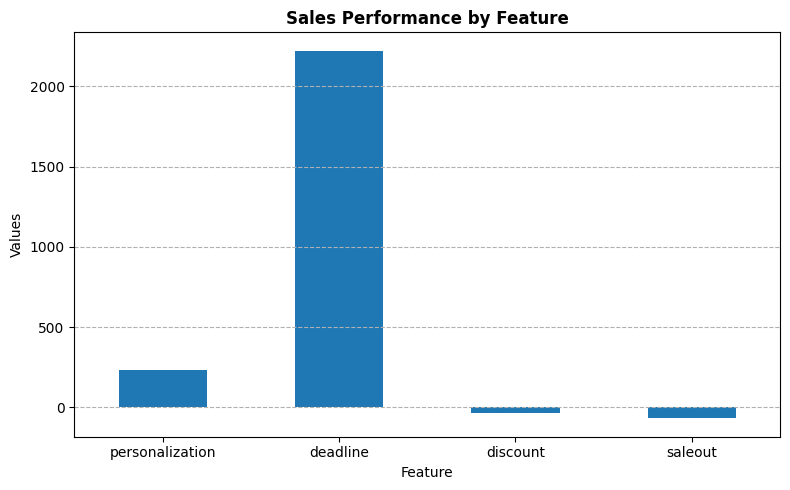

In [ ]:
list_index = ['personalization', 'deadline', 'discount', 'saleout']
sales_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index],
                                  'Percent Increase': [get_percent(diff, i) for i in list_index]},
                                 index = list_index)

display(sales_performance)

In [ ]:
sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature', weight='bold')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Clickthrough Rate


In [ ]:
personalization = merged_df.groupby('subject_with_personalization')['is_clicked'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_clicked'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_clicked'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_clicked'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_clicked', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [ ]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_clicked                0         1
                                     
personalization 0  0.999156  0.000844
                1  0.996346  0.003654
deadline        0  0.991945  0.008055
                1  0.953047  0.046953
discount        0  0.995674  0.004326
                1  0.992866  0.007134
saleout         0  0.966695  0.033305
                1  0.976915  0.023085

,Difference,Percent Increase
personalization,0.002810,332.940350
deadline,0.038898,482.900877
discount,0.002808,64.907226
saleout,-0.010219,-30.684733


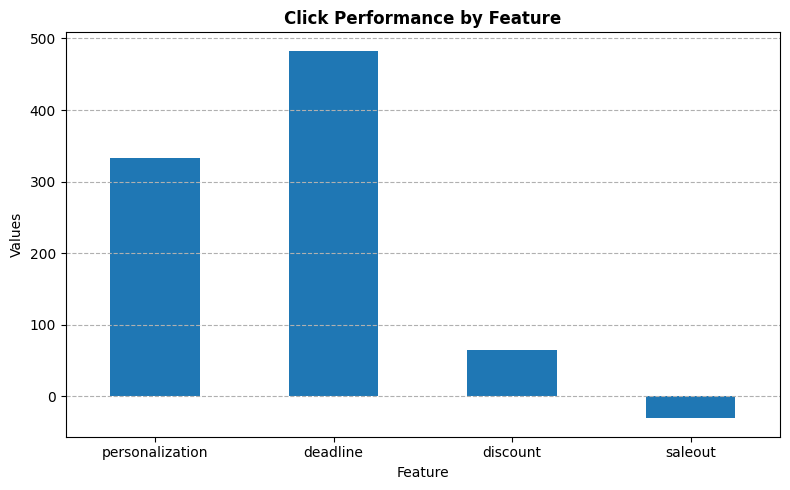

In [ ]:
list_index = ['personalization', 'deadline', 'discount', 'saleout']
click_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index],
                                  'Percent Increase': [get_percent(diff, i) for i in list_index]},
                                 index = list_index)

display(click_performance)

In [ ]:
click_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Click Performance by Feature', weight='bold')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Customer Engagement

In [ ]:
personalization = merged_df.groupby('subject_with_personalization')['is_unsubscribed'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_unsubscribed'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_unsubscribed'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_unsubscribed'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_unsubscribed', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [ ]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_unsubscribed           0         1
                                     
personalization 0  0.999085  0.000915
                1  0.999966  0.000034
deadline        0  0.991113  0.008887
                1  0.999579  0.000421
discount        0  0.995590  0.004410
                1  0.996759  0.003241
saleout         0  0.965492  0.034508
                1  0.997464  0.002536

,Difference,Percent Increase
personalization,0.0,0.088175
deadline,0.0,0.854153
discount,0.0,0.117328
saleout,0.0,3.311484


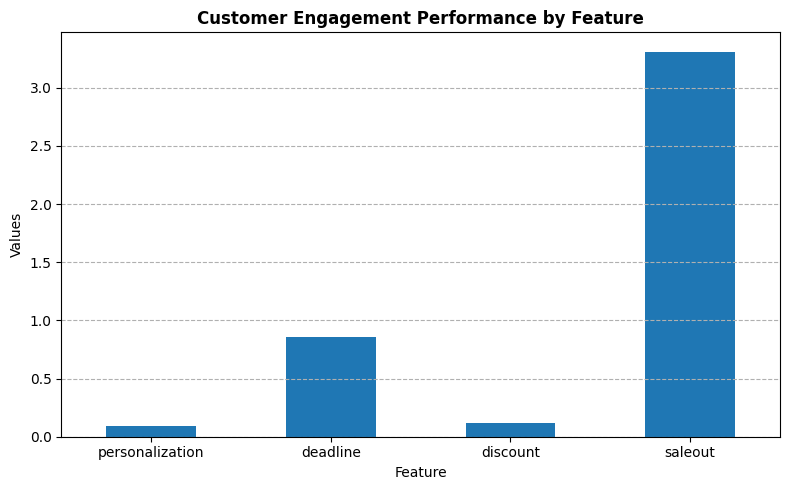

In [ ]:
list_index = ['personalization', 'deadline', 'discount', 'saleout']
engagement_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index],
                                       'Percent Increase': [get_percent(diff, i) for i in list_index]},
                                      index = list_index)

display(engagement_performance)

In [ ]:
engagement_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Customer Engagement Performance by Feature', weight='bold')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Combined Marketing Performance
Comparison between sales, clickthrough rates, and customer engagement

,Percent Increase,Percent Increase,Percent Increase
personalization,0.088175,232.400964,332.940350
deadline,0.854153,2221.117595,482.900877
discount,0.117328,-33.089003,64.907226
saleout,3.311484,-67.757146,-30.684733


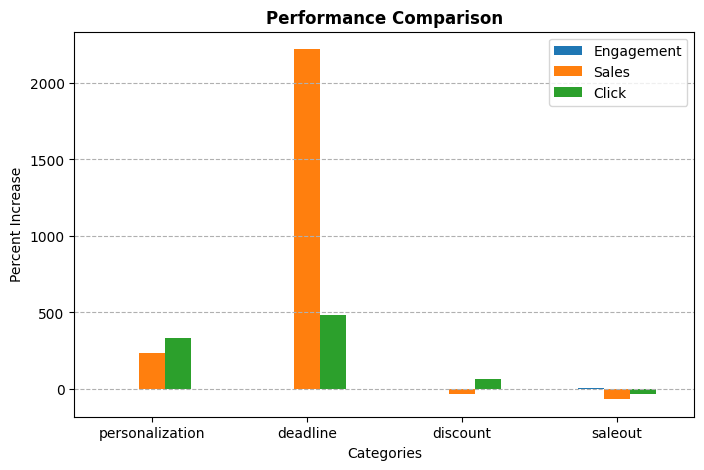

In [ ]:
combined_data = pd.concat([engagement_performance, sales_performance, click_performance], axis=1)
display(combined_data['Percent Increase'])

In [ ]:
combined_data['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.xlabel('Categories')
plt.ylabel('Percent Increase')
plt.grid(axis='y', linestyle='--')
plt.title('Performance Comparison', weight='bold')
plt.xticks(rotation=0)
plt.legend(['Engagement', 'Sales', 'Click'])
plt.show()

### Marketing Performance based on Channel Type


In [ ]:
channel_type = merged_df.groupby('channel')
channel_purchases = channel_type['is_purchased'].value_counts()
channel_clicks = channel_type['is_clicked'].value_counts()

result_table = pd.concat([channel_purchases, channel_clicks], axis=1, keys=['purchased', 'clicked'])
result_table = result_table.unstack(level=1).fillna(0)
display(result_table)

channel      is_purchased
email        0               1133453
             1                  1028
mobile_push  0               1661720
Name: count, dtype: int64
channel      is_clicked
email        0             1102125
             1               32356
mobile_push  0             1659595
             1                2125
Name: count, dtype: int64


purchased          clicked       
                     0       1        0      1
channel                                       
email        1133453.0  1028.0  1102125  32356
mobile_push  1661720.0     0.0  1659595   2125

### The Impact of Subject Length on Email Open Rates

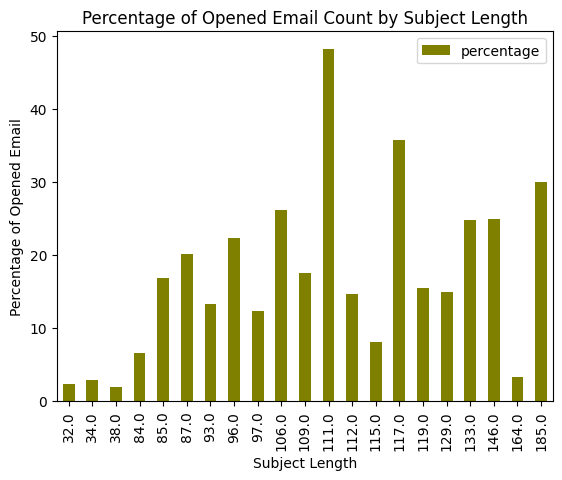

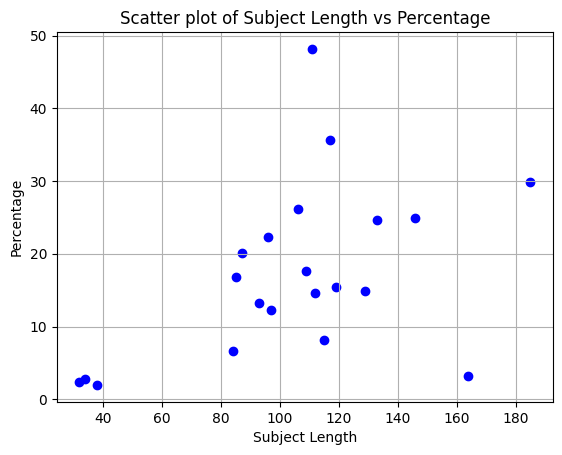

In [ ]:
grouped_data = merged_df.groupby(['subject_length', 'is_opened']).size().reset_index(name='count')
opened_data = grouped_data[grouped_data['is_opened'] == 1]
ignored_data = grouped_data[grouped_data['is_opened'] == 0]

pivot_data = grouped_data.pivot_table(index='subject_length', columns='is_opened', values='count', fill_value=0)
pivot_data['percentage'] = (pivot_data[1] / (pivot_data[1] + pivot_data[0])) * 100
pivot_data.reset_index(inplace=True)

In [ ]:
pivot_data.plot(kind='bar', x='subject_length', y='percentage', color='olive')
plt.xlabel('Subject Length')
plt.ylabel('Percentage of Opened Email')
plt.title('Percentage of Opened Email Count by Subject Length')
plt.show()

In [ ]:
plt.scatter(pivot_data['subject_length'], pivot_data['percentage'], color='blue', label='Data Points')
plt.xlabel('Subject Length')
plt.ylabel('Percentage')
plt.title('Scatter plot of Subject Length vs Percentage')
plt.grid(True)
plt.show()

### Checking if holidays correspond to client purchases

In [ ]:
clicked_per_topic = merged_df.groupby("topic")["is_clicked"].value_counts()
opened_per_topic = merged_df.groupby("topic")["is_opened"].value_counts()
purchased_per_topic = merged_df.groupby("topic")["is_purchased"].value_counts()

topic     is_clicked
event     0                6152
          1                 299
sale out  0             2755568
          1               34182
Name: count, dtype: int64

topic     is_opened
event     0               4727
          1               1724
sale out  0            2400463
          1             389287
Name: count, dtype: int64

topic     is_purchased
event     0                  6445
          1                     6
sale out  0               2788728
          1                  1022
Name: count, dtype: int64

<class 'numpy.ndarray'>


,index,is_opened,is_clicked,is_purchased
0,"(event, 0)",4727,6152,6445
1,"(event, 1)",1724,299,6
2,"(sale out, 0)",2400463,2755568,2788728
3,"(sale out, 1)",389287,34182,1022


In [ ]:
engagement_per_topic = pd.DataFrame({
    "index": clicked_per_topic.index,
    "is_opened": opened_per_topic.values,
    "is_clicked": clicked_per_topic.values,
    "is_purchased": purchased_per_topic.values
})
display(engagement_per_topic)

In [ ]:
def calc_perecentage(rest, part):
    if rest + part == 0:
        return 0
    return (part / (rest + part)) * 100

def calc_percentages(col_name):
    topics_clicks = topcis_engagement.groupby("topic")[col_name].value_counts()
    percentages = []
    for i in range(0, len(topics_clicks), 2):
        percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))
    return percentages

C:\Users\mahmo\AppData\Local\Temp\ipykernel_7180\3606868225.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))
C:\Users\mahmo\AppData\Local\Temp\ipykernel_7180\3606868225.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


topic
sale out    2789750
event          6451
Name: count, dtype: int64


C:\Users\mahmo\AppData\Local\Temp\ipykernel_7180\3606868225.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


In [ ]:
topics = merged_df["topic"].value_counts()
topcis_engagement = merged_df.loc[merged_df["topic"].isin(topics.index)][["topic", "is_clicked", "is_opened", "is_purchased"]]
topics_clicks = topcis_engagement.groupby("topic")["is_clicked"].value_counts()

clicks_percentages = calc_percentages("is_clicked")
opened_percentages = calc_percentages("is_opened")
purchased_percentages = calc_percentages("is_purchased")

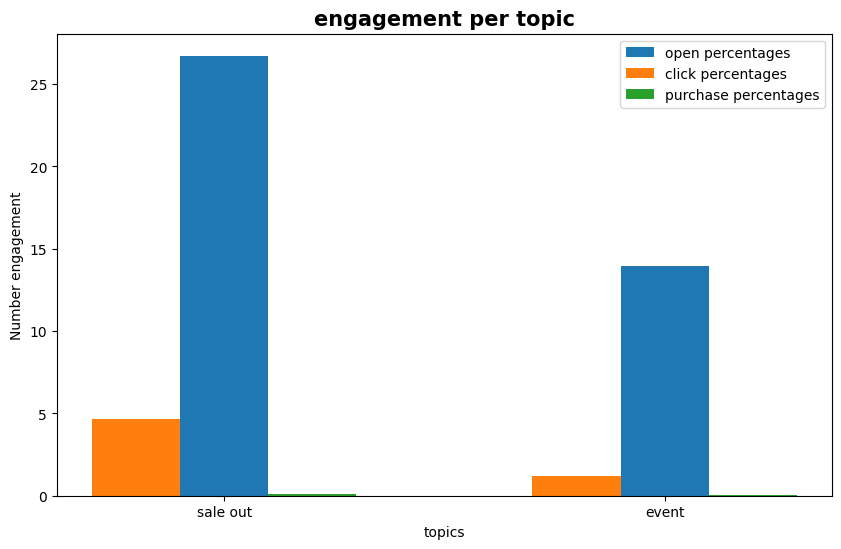

In [ ]:
X_axis = np.arange(len(topics.index.values))
plt.figure(figsize=(10,6))
plt.bar(X_axis , opened_percentages, 0.2, label = 'open percentages')
plt.bar(X_axis - 0.2, clicks_percentages, 0.2, label = 'click percentages')
plt.bar(X_axis + 0.2, purchased_percentages, 0.2, label = 'purchase percentages')
plt.xticks(X_axis, topics.index.values)
plt.xlabel("topics")
plt.ylabel("Number engagement")
plt.title("engagement per topic", fontweight = "bold", fontsize = 15)
plt.legend()
plt.show()

**Holidays effect on sales**

In [ ]:
holiday_df = pd.read_csv("holidays.csv")
merged_df2 = pd.merge(merged_df, holiday_df, left_on="date", right_on="date", how="inner")
print(f"we have {len(merged_df2)} engagement on holidays")

we have 0 engagement on holidays


**OBSERVATION** when merging our DataFrame with holiday using the dates we get an empty DataFrame as there are 0 messages on holidays and therefore 0 purchases & clicks. Now we will check the weeks before the holidays as people tend to shop before the holidays.

In [ ]:
def weekly_percentage(li):
    perc = []
    for i in range(len(li[:])):
        if li[i] == 0:
            perc.append(0)
            continue
        elif li[i - 1] == 0:
            perc.append(li[i])
            continue
        percentage = li[i]/ ( li[i - 1])
        perc.append(percentage)
    return perc

In [ ]:
merged_df["date"] = pd.to_datetime(merged_df["date"])
merged_df['week_number'] = merged_df['date'].dt.isocalendar().week

holiday_df["date"] = pd.to_datetime(holiday_df["date"])
holiday_df["week_number"] = holiday_df['date'].dt.isocalendar().week

holiday_weeks = holiday_df["week_number"].unique()

weekly_grouped = merged_df.groupby('week_number').agg({
    'is_opened': 'sum', 'is_clicked': 'sum', 'is_purchased': 'sum'
})

weekly_grouped = weekly_grouped.reset_index()
display(weekly_grouped)

,week_number,is_opened,is_clicked,is_purchased
0,17,55453,0,0
1,18,79178,0,0
2,19,28593,0,0
3,20,133150,23066,557
4,21,41878,4935,121
5,22,19271,2585,90
6,23,33488,3895,260


         date               holiday  week_number
10 2021-05-01  Spring and Labor Day           17
11 2021-05-09           Victory day           18
12 2021-06-12      Independence Day           23


,purchase_percentage_increase_ from_last_week,clicks_percentage_increase_from_last_week
week,,
17,0.000000,0.000000
18,0.000000,0.000000
19,0.000000,0.000000
20,557.000000,23066.000000
21,0.217235,0.213951
22,0.743802,0.523810
23,2.888889,1.506770


In [ ]:
engagement_weeks = weekly_grouped["week_number"].values
holidays = holiday_df[holiday_df["week_number"].isin(engagement_weeks)]
holidays = holidays[holidays["date"].dt.year == 2021]

purchases_weekly_perc = weekly_percentage(weekly_grouped["is_purchased"].values)
clicks_weekly_perc = weekly_percentage(weekly_grouped["is_clicked"].values)

improvements = pd.DataFrame({
    "week": weekly_grouped["week_number"],
    "purchase_percentage_increase_ from_last_week": purchases_weekly_perc,
    "clicks_percentage_increase_from_last_week": clicks_weekly_perc
}).set_index("week")

display(improvements)

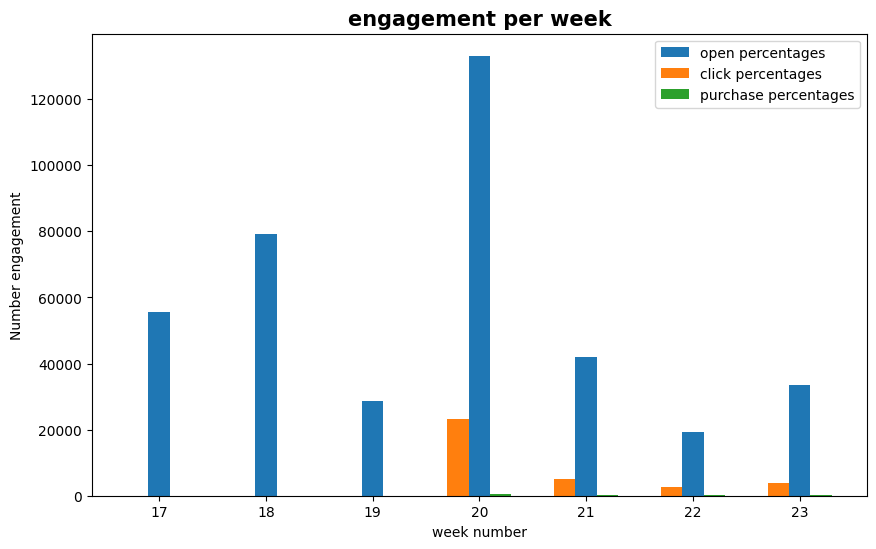

In [ ]:
X_axis = np.arange(len(weekly_grouped["week_number"]))
plt.figure(figsize=(10,6))
plt.bar(X_axis , weekly_grouped["is_opened"], 0.2, label = 'open percentages')
plt.bar(X_axis - 0.2, weekly_grouped["is_clicked"], 0.2, label = 'click percentages')
plt.bar(X_axis + 0.2, weekly_grouped["is_purchased"], 0.2, label = 'purchase percentages')
plt.xticks(X_axis, weekly_grouped["week_number"])
plt.xlabel("week number")
plt.ylabel("Number engagement")
plt.title("engagement per week", fontweight = "bold", fontsize = 15)
plt.legend()
plt.show()